In [1]:
from yt.utilities.cosmology import Cosmology
import h5py
import shutil
import numpy as np
import os
import sys
import illustris_python as il
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import astropy.units as u
from astropy import wcs
from astropy.io import fits
from numbers import Number

basepaths = {'TNG100': ['/virgotng/universe/IllustrisTNG/TNG100-1/output',99],
              'SIMBA': ['/virgotng/universe/Simba/L100n1024FP/output',151],
              'EAGLE': ['/virgotng/universe/Eagle/Eagle100-1/output',28]  
            }

In [2]:
with open('/vera/ptmp/gc/madepa/data/r200c_radial_data.pickle', 'rb') as f:
    rad_dict = pickle.load(f)

/tmp/ipykernel_57573/3481574465.py:15: RuntimeWarning: divide by zero encountered in log10
  gas_density = np.log10(gas_mass/gas_vol) # Msun/pkpc**3


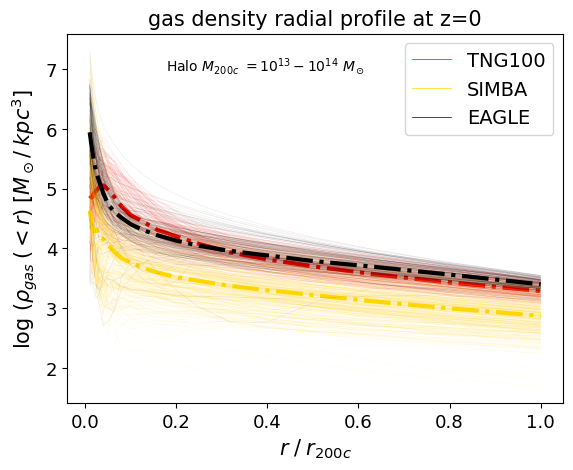

In [116]:
fig, ax = plt.subplots()
colors = {'TNG100': 'red', 'SIMBA': 'gold', 'EAGLE': 'black'}
legend_handles = []

for index, (sim, halo_dict) in enumerate(rad_dict.items()):
    if sim in ('TNG100', 'SIMBA', 'EAGLE'): 
        legend_handles.append(plt.Line2D([], [], color=colors[sim], lw=0.5, label=sim)) 
        # start an array to store the values of the gas fraction in each bin
        bin_array = np.ones( (len(halo_dict.keys()), 21) )
        
        for i, haloID in enumerate(halo_dict.keys()):
            gas_mass = rad_dict[sim][f'{haloID}']['gas_mass_in_bins_cumulative'] # Msun
            gas_rad = rad_dict[sim][f'{haloID}']['phys_radii'][1:] # pkpc
            gas_vol = 4/3 * np.pi * (gas_rad)**3 # pkpc**3
            gas_density = np.log10(gas_mass/gas_vol) # Msun/pkpc**3
            ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], gas_density, alpha=0.1, color=colors[sim], lw=0.3) 
            
            for j in range(21):
                bin_array[i, j] = gas_density[j]

        median = np.median(bin_array, axis=0)
        ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], median, '-.', color=colors[sim], lw=3)

#ax.set_yscale('log')
ax.set_title('gas density radial profile at z=0', fontsize=15)
ax.set_xlabel('$r \;/\; r_{200c}$', fontsize=15)
ax.set_ylabel('log ($ \\rho_{gas} \:(<r)\; [M_\odot / \; kpc^3]$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
#ax.set_ylim(10**2, 10**7.5)
ax.text(0.2, 0.9, 'Halo $ M _{200c}  $ $ = 10^{13} - 10^{14}$ $ M_\odot $', fontsize=10, transform=ax.transAxes) 
plt.legend(handles=legend_handles, fontsize=14)               
plt.savefig('../plots/gassdens_radprof.pdf')

/tmp/ipykernel_57573/2171435103.py:14: RuntimeWarning: divide by zero encountered in log10
  ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], np.log10(gas_mass), alpha=0.1, color=colors[sim], lw=0.4)
/tmp/ipykernel_57573/2171435103.py:17: RuntimeWarning: divide by zero encountered in log10
  bin_array[i, j] = np.log10(gas_mass[j])


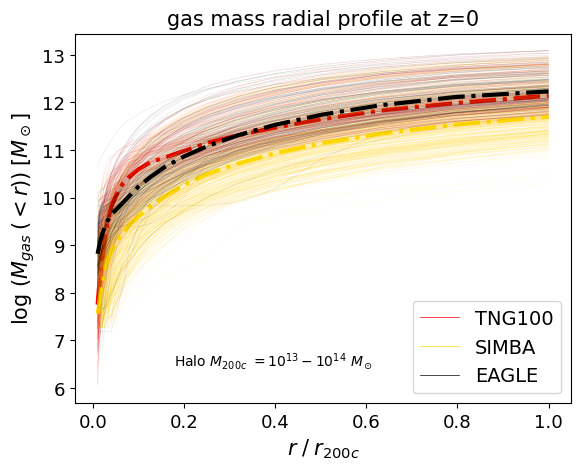

In [91]:
fig, ax = plt.subplots()
colors = {'TNG100': 'red', 'SIMBA': 'gold', 'EAGLE': 'black'}
legend_handles = []

for index, (sim, halo_dict) in enumerate(rad_dict.items()):
    if sim in ('TNG100', 'SIMBA', 'EAGLE'): 
        
        legend_handles.append(plt.Line2D([], [], color=colors[sim], lw=0.5, label=sim)) 
        # start an array to store the values of the gas fraction in each bin
        bin_array = np.ones( (len(halo_dict.keys()), 21) )
        
        for i, haloID in enumerate(halo_dict.keys()):
            gas_mass = rad_dict[sim][f'{haloID}']['gas_mass_in_bins_cumulative'] # Msun
            ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], np.log10(gas_mass), alpha=0.1, color=colors[sim], lw=0.4) 
            
            for j in range(21):
                bin_array[i, j] = np.log10(gas_mass[j])

        median = np.median(bin_array, axis=0)
        ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], median, '-.', color=colors[sim], lw=3)

        
#ax.set_yscale('log')
ax.set_title('gas mass radial profile at z=0', fontsize=15)
ax.set_xlabel('$r \;/\; r_{200c}$', fontsize=15)
ax.set_ylabel('log ($M_{gas} \: (<r))\; [M_\odot]$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
#ax.set_ylim(10**7, 10**13.2)
ax.text(0.2, 0.1, 'Halo $ M _{200c}  $ $ = 10^{13} - 10^{14}$ $ M_\odot $', fontsize=10, transform=ax.transAxes) 
plt.legend(handles=legend_handles, fontsize=14)               
plt.savefig('../plots/gassmass_radprof.pdf')

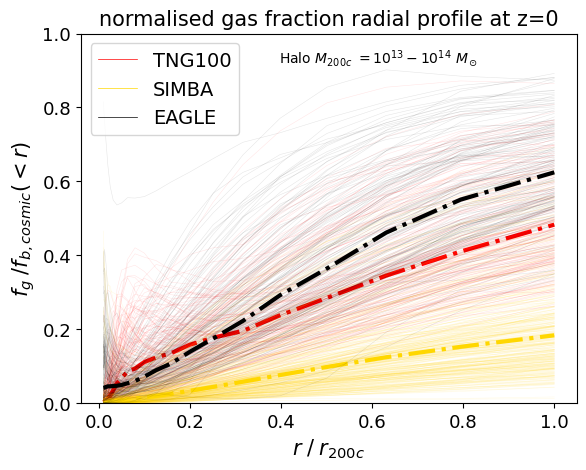

In [115]:
fig, ax = plt.subplots()
colors = {'TNG100': 'red', 'SIMBA': 'gold', 'EAGLE': 'black'}
legend_handles = []

for index, (sim, halo_dict) in enumerate(rad_dict.items()):
    if sim in ('TNG100', 'SIMBA', 'EAGLE'): 
        legend_handles.append(plt.Line2D([], [], color=colors[sim], lw=0.5, label=sim)) 
        
        # start an array to store the values of the gas fraction in each bin
        bin_array = np.ones( (len(halo_dict.keys()), 21) )
        
        for i, haloID in enumerate(halo_dict.keys()):
            gas_mass = rad_dict[sim][f'{haloID}']['gas_mass_in_bins_cumulative'] # Msun
            tot_mass = rad_dict[sim][f'{haloID}']['tot_mass_in_bins_cumulative'] # Msun
            gas_frac = gas_mass/tot_mass/0.16
            ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], gas_frac, alpha=0.1, color=colors[sim], lw=0.4) 
            
            for j in range(21):
                    bin_array[i, j] = gas_frac[j]

        median = np.median(bin_array, axis=0)
        ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], median, '-.', color=colors[sim], lw=3)

ax.set_title('normalised gas fraction radial profile at z=0', fontsize=15)
ax.set_xlabel('$r \;/\; r_{200c}$', fontsize=15)
ax.set_ylabel('$f_g \; / f_{b,cosmic} (<r)$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylim(0, 1)
ax.text(0.4, 0.92, 'Halo $ M _{200c}  $ $ = 10^{13} - 10^{14}$ $ M_\odot $', fontsize=10, transform=ax.transAxes) 
plt.legend(handles=legend_handles, fontsize=14)               
plt.savefig('../plots/gassfrac_radprof.pdf')

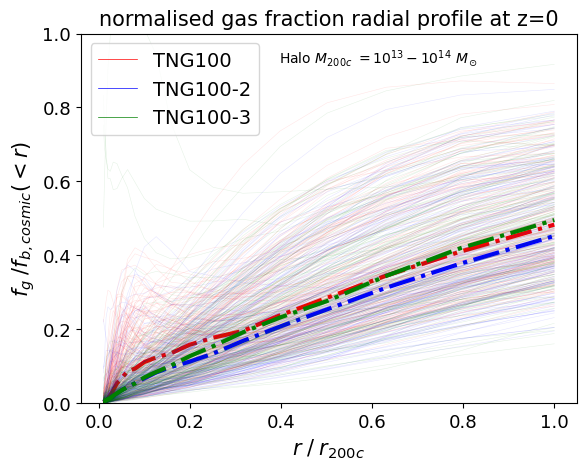

In [31]:
fig, ax = plt.subplots()
colors = {'TNG100': 'red', 'TNG100-2': 'blue', 'TNG100-3': 'green'}
legend_handles = []

for index, (sim, halo_dict) in enumerate(rad_dict.items()):
    if sim in ('TNG100', 'TNG100-2', 'TNG100-3'): 
        
        legend_handles.append(plt.Line2D([], [], color=colors[sim], lw=0.5, label=sim)) 
        # start an array to store the values of the gas fraction in each bin
        bin_array = np.ones( (len(halo_dict.keys()), 21) )
        
        for i, haloID in enumerate(halo_dict.keys()):
            gas_mass = rad_dict[sim][f'{haloID}']['gas_mass_in_bins_cumulative'] # Msun
            tot_mass = rad_dict[sim][f'{haloID}']['tot_mass_in_bins_cumulative'] # Msun
            gas_frac = gas_mass/tot_mass/0.16
            ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], gas_frac, alpha=0.1, color=colors[sim], lw=0.4) 
            
            for j in range(21):
                    bin_array[i, j] = gas_frac[j]

        median = np.median(bin_array, axis=0)
        ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], median, '-.', color=colors[sim], lw=3)

ax.set_title('normalised gas fraction radial profile at z=0', fontsize=15)
ax.set_xlabel('$r \;/\; r_{200c}$', fontsize=15)
ax.set_ylabel('$f_g \; / f_{b,cosmic} (<r)$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylim(0, 1)
ax.text(0.4, 0.92, 'Halo $ M _{200c}  $ $ = 10^{13} - 10^{14}$ $ M_\odot $', fontsize=10, transform=ax.transAxes) 
plt.legend(handles=legend_handles, fontsize=14)               
plt.savefig('../plots/tng_gassfrac_radprof.pdf')

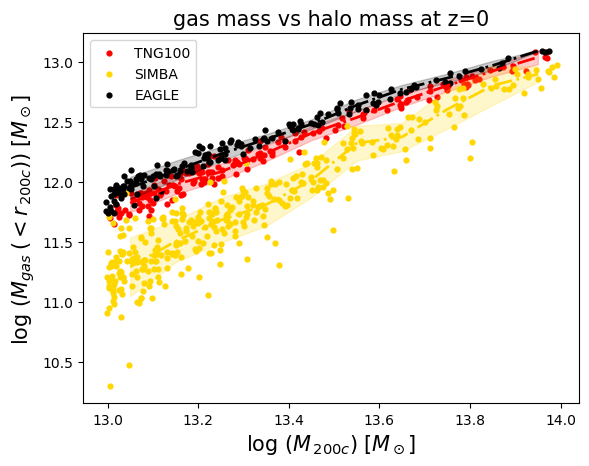

In [9]:
fig, ax = plt.subplots()
colors = {'TNG100': 'red', 'SIMBA': 'gold', 'EAGLE': 'black'}

for sim, halo_dict in rad_dict.items():
    if sim in colors: 
  
        # start an array to store the values of the gas fraction in each bin
        gas_array = np.ones( len(halo_dict.keys()) )
        mass_array = np.ones( len(halo_dict.keys()) )


        for index, (haloID, fields_dict) in enumerate(halo_dict.items()):
            
            gas_mass = fields_dict['gas_mass_in_bins_cumulative'][-1]
            tot_mass = fields_dict['tot_mass_in_bins_cumulative'][-1]
            
            gas_array[index] = np.log10(gas_mass)
            mass_array[index] = np.log10(tot_mass)
        
 
        #print(gas_array)
        # Plot each simulation with a different color
        ax.scatter(mass_array, gas_array, s=12, marker='o', color=colors[sim], label=sim)

        # Calculate median and standard deviation in bins
        nbins = 10
        bin_edges = np.linspace(13, 14, nbins+1)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        median_gas = []
        std_gas = []


        for k in range(nbins):
            bin_mask = (mass_array >= bin_edges[k]) & (mass_array < bin_edges[k + 1])
            if np.any(bin_mask):  
                median_gas.append(np.median(gas_array[bin_mask]))
                std_gas.append(np.std(gas_array[bin_mask]))
            else:
                median_gas.append(np.nan)
                std_gas.append(np.nan)

        # Convert to numpy arrays for plotting
        median_gas = np.array(median_gas)
        std_gas = np.array(std_gas)

        ax.plot(bin_centers, median_gas, color=colors[sim], linestyle='-.', linewidth=2)
        ax.fill_between(bin_centers, median_gas - std_gas, median_gas + std_gas,
                        color=colors[sim], alpha=0.2)

ax.set_title('gas mass vs halo mass at z=0', fontsize=15)
ax.set_xlabel('log ($M_{\,200c}) \; [M_\odot]$', fontsize=15)
ax.set_ylabel('log ($M_{gas} \:(< r_{\,200c})) \; [M_\odot]$', fontsize=15)
ax.legend()

plt.savefig('../plots/gasmass_vs_totmass.pdf')

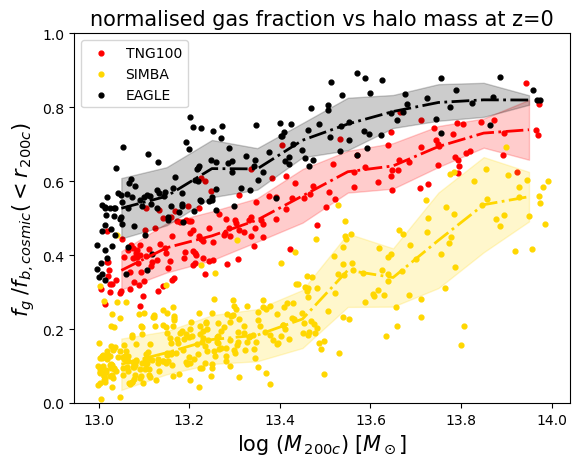

In [10]:
fig, ax = plt.subplots()
colors = {'TNG100': 'red', 'SIMBA': 'gold', 'EAGLE': 'black'}

for sim, halo_dict in rad_dict.items():
    if sim in colors: 
  
        # start an array to store the values of the gas fraction in each bin
        gas_array = np.ones( len(halo_dict.keys()) )
        mass_array = np.ones( len(halo_dict.keys()))


        for index, (haloID, fields_dict) in enumerate(halo_dict.items()):
            
            gas_mass = fields_dict['gas_mass_in_bins_cumulative'][-1]
            tot_mass = fields_dict['tot_mass_in_bins_cumulative'][-1]
            gas_frac = gas_mass/tot_mass/0.16
            gas_array[index] = gas_frac
            mass_array[index] = np.log10(tot_mass)
        
 
        #print(gas_array)
        # Plot each simulation with a different color
        ax.scatter(mass_array, gas_array, s=12, marker='o', color=colors[sim], label=sim)

        # Calculate median and standard deviation in bins
        nbins = 10
        bin_edges = np.linspace(13, 14, nbins+1)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        median_gas = []
        std_gas = []


        for k in range(nbins):
            bin_mask = (mass_array >= bin_edges[k]) & (mass_array < bin_edges[k + 1])
            if np.any(bin_mask):  
                median_gas.append(np.median(gas_array[bin_mask]))
                std_gas.append(np.std(gas_array[bin_mask]))
            else:
                median_gas.append(np.nan)
                std_gas.append(np.nan)

        # Convert to numpy arrays for plotting
        median_gas = np.array(median_gas)
        std_gas = np.array(std_gas)

        ax.plot(bin_centers, median_gas, color=colors[sim], linestyle='-.', linewidth=2)
        ax.fill_between(bin_centers, median_gas - std_gas, median_gas + std_gas,
                        color=colors[sim], alpha=0.2)

ax.set_title('normalised gas fraction vs halo mass at z=0', fontsize=15)
ax.set_xlabel('log ($M_{\,200c}) \; [M_\odot]$', fontsize=15)
ax.set_ylabel('$f_g \; / f_{b,cosmic}(< r_{\,200c})$', fontsize=15)
ax.set_ylim(0, 1)
ax.legend()

plt.savefig('../plots/gasfrac_vs_totmass.pdf')

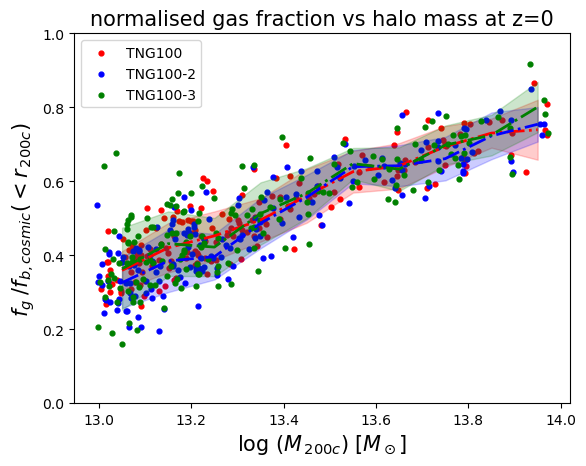

In [11]:
fig, ax = plt.subplots()
colors = {'TNG100': 'red', 'TNG100-2': 'blue', 'TNG100-3': 'green'}

for sim, halo_dict in rad_dict.items():
    if sim in colors: 
  
        # start an array to store the values of the gas fraction in each bin
        gas_array = np.ones( len(halo_dict.keys()) )
        mass_array = np.ones( len(halo_dict.keys()))


        for index, (haloID, fields_dict) in enumerate(halo_dict.items()):
            
            gas_mass = fields_dict['gas_mass_in_bins_cumulative'][-1]
            bar_mass = (fields_dict['gas_mass_in_bins_cumulative'][-1]
                        + fields_dict['star_mass_in_bins_cumulative'][-1]
                        + fields_dict['bh_mass_in_bins_cumulative'][-1])
            tot_mass = fields_dict['tot_mass_in_bins_cumulative'][-1]
            gas_frac = gas_mass/tot_mass/0.16
            gas_array[index] = gas_frac
            mass_array[index] = np.log10(tot_mass)
        
 
        #print(gas_array)
        # Plot each simulation with a different color
        ax.scatter(mass_array, gas_array, s=12, marker='o', color=colors[sim], label=sim)

        # Calculate median and standard deviation in bins
        nbins = 10
        bin_edges = np.linspace(13, 14, nbins+1)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        median_gas = []
        std_gas = []


        for k in range(nbins):
            bin_mask = (mass_array >= bin_edges[k]) & (mass_array < bin_edges[k + 1])
            if np.any(bin_mask):  
                median_gas.append(np.median(gas_array[bin_mask]))
                std_gas.append(np.std(gas_array[bin_mask]))
            else:
                median_gas.append(np.nan)
                std_gas.append(np.nan)

        # Convert to numpy arrays for plotting
        median_gas = np.array(median_gas)
        std_gas = np.array(std_gas)

        ax.plot(bin_centers, median_gas, color=colors[sim], linestyle='-.', linewidth=2)
        ax.fill_between(bin_centers, median_gas - std_gas, median_gas + std_gas,
                        color=colors[sim], alpha=0.2)

ax.set_title('normalised gas fraction vs halo mass at z=0', fontsize=15)
ax.set_xlabel('log ($M_{\,200c}) \; [M_\odot]$', fontsize=15)
ax.set_ylabel('$f_g \; / f_{b,cosmic}(< r_{\,200c})$', fontsize=15)
ax.set_ylim(0, 1)
ax.legend()

plt.savefig('../plots/tng_gasfrac_vs_totmass.pdf')

In [16]:
def median_gas_vs_baryons(result):
    
    fig, ax = plt.subplots()
    colors = {'TNG100': 'red', 'SIMBA': 'gold', 'EAGLE': 'black'}
    
    for sim, result_dict in result.items():
        if sim in ('TNG100', 'SIMBA', 'EAGLE'):
            haloIDs = [key for key in result_dict.keys()]
            
            # start an array to store the values of the gas fraction in each bin
            bin_array = np.ones( len(haloIDs) )
            mass_array = np.ones( len(haloIDs))


            for index, haloID in enumerate(haloIDs):
                halo_key = f'{haloID}'
                gas_mass = result_dict[haloID]['gas_mass_in_bins_cumulative'][-1]
                bar_mass = (result_dict[haloID]['gas_mass_in_bins_cumulative'][-1]
                            + result_dict[haloID]['star_mass_in_bins_cumulative'][-1]
                            + result_dict[haloID]['bh_mass_in_bins_cumulative'][-1])
                tot_mass = result_dict[haloID]['tot_mass_in_bins_cumulative'][-1]
                bin_array[index] = gas_mass/bar_mass
                mass_array[index] = np.log10(tot_mass)
                
            # Calculate median and standard deviation in bins
            nbins = 10
            bin_edges = np.linspace(13, 14, nbins+1)
            bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
            median_gasf = []
            std_gasf = []


            for k in range(nbins):
                bin_mask = (mass_array >= bin_edges[k]) & (mass_array < bin_edges[k + 1])
                if np.any(bin_mask):  # Check if there's data in the bin
                    median_gasf.append(np.median(bin_array[bin_mask]))
                    std_gasf.append(np.std(bin_array[bin_mask]))
                else:
                    median_gasf.append(np.nan)
                    std_gasf.append(np.nan)

            # Convert to numpy arrays for plotting
            median = np.array(median_gasf)
            std = np.array(std_gasf)


            ax.scatter(mass_array, bin_array, label = sim, color=colors[sim], s=12)
            ax.plot(bin_centers, median, color=colors[sim], linestyle='-.', linewidth=2)
            ax.fill_between(bin_centers, median - std , median + std , 
                            color=colors[sim], alpha=0.2)
        
    plt.legend()
    #ax.set_xlim(13,14)
    #ax.set_ylim(0,1)
    ax.set_ylabel('$M_{gas}\:/\:M_{baryon}\; (< r_{200c})$', fontsize=15)
    ax.set_xlabel('log($M_{\,200c}) \; [M_\odot]$', fontsize=15)
    ax.set_title('gas vs baryons at z=0', fontsize=15)

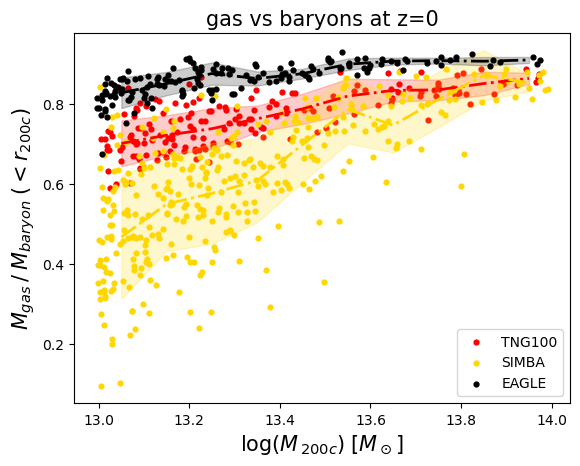

In [17]:
median_gas_vs_baryons(rad_dict)
plt.savefig('../plots/gas_vs_bar.pdf')

In [78]:
def median_radial_profile(result):
    
    fig, ax = plt.subplots()
    colors = {'TNG100': 'red', 'SIMBA': 'gold', 'EAGLE': 'black'}
    
    for sim, result_dict in result.items():
        if sim in ('TNG100', 'SIMBA', 'EAGLE'):
            haloIDs = [key for key in result_dict.keys()]
            bincents = result_dict[haloIDs[0]]['norm_radii']

            # start an array to store the values of the gas fraction in each bin
            bin_array = np.ones( (len(haloIDs), len(bincents)) )
            

            for index, haloID in enumerate(haloIDs):
                halo_key = f'{haloID}'

                for i in range(len(bincents)):
                    bin_array[index, i] = ((result_dict[halo_key]['gas_mass_in_bins_cumulative'][i]) / 
                                           result_dict[halo_key]['tot_mass_in_bins_cumulative'][i]) / 0.16

            median = np.median(bin_array, axis=0)
            #minimum = np.min(bin_array, axis=0)
            #maximum = np.max(bin_array, axis=0)
            std = np.std(bin_array, axis=0)     
            
            ax.plot(bincents, median, '-', label = sim, color=colors[sim])
            ax.fill_between(bincents, median-std, median+std, color=colors[sim], alpha=0.1)
        
    #ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    plt.legend()
    ax.text(0.025, 0.9, 'Halo $ M _{200c}  $ $ = 10^{13} - 10^{14}$ $ M_\odot $', fontsize=12, transform=ax.transAxes)
    ax.set_ylabel('$f_g(<r) \;/\; f_{b,cosmic}$', fontsize=15)
    ax.set_xlabel('$r \:/ \:r_{200c}$', fontsize=15)
    ax.set_title('gas fraction radial profile at z=0', fontsize=15)

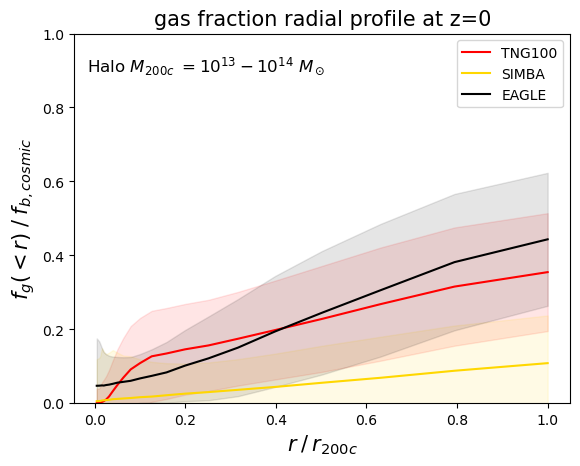

In [79]:
median_radial_profile(rad_dict)
plt.savefig('../plots/gasfrac_radprof.pdf')

In [80]:
def tng_median_radial_profile(result):
    
    fig, ax = plt.subplots()
    colors = {'TNG100': 'red', 'TNG100-2': 'blue', 'TNG100-3': 'green'}
    
    for sim, result_dict in result.items():
        if sim in ('TNG100', 'TNG100-2' , 'TNG100-3'):
            haloIDs = [key for key in result_dict.keys()]
            bincents = result_dict[haloIDs[0]]['norm_radii']

            # start an array to store the values of the gas fraction in each bin
            bin_array = np.ones( (len(haloIDs), len(bincents)) )
            

            for index, haloID in enumerate(haloIDs):
                halo_key = f'{haloID}'

                for i in range(len(bincents)):
                    bin_array[index, i] = ((result_dict[halo_key]['gas_mass_in_bins_cumulative'][i]) / 
                                           result_dict[halo_key]['tot_mass_in_bins_cumulative'][i]) / 0.16

            median = np.median(bin_array, axis=0)
            #minimum = np.min(bin_array, axis=0)
            #maximum = np.max(bin_array, axis=0)
            std = np.std(bin_array, axis=0)     
            
            ax.plot(bincents, median, '-', label = sim, color=colors[sim])
            ax.fill_between(bincents, median-std, median+std, color=colors[sim], alpha=0.1)
        
    #ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    plt.legend()
    ax.text(0.025, 0.9, 'Halo $ M _{200c}  $ $ = 10^{13} - 10^{14}$ $ M_\odot $', fontsize=12, transform=ax.transAxes)
    ax.set_ylabel('$f_g(<r) \;/\; f_{b,cosmic}$', fontsize=15)
    ax.set_xlabel('$r \:/ \:r_{200c}$', fontsize=15)
    ax.set_title('gas fraction radial profile at z=0', fontsize=15)

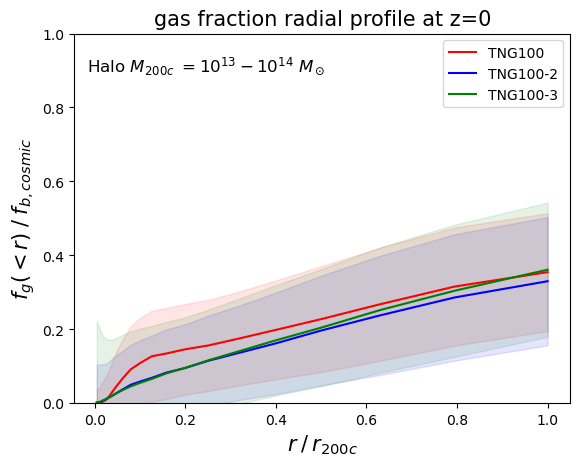

In [81]:
tng_median_radial_profile(rad_dict)
plt.savefig('../plots/tng_gasfrac_radprof.pdf')

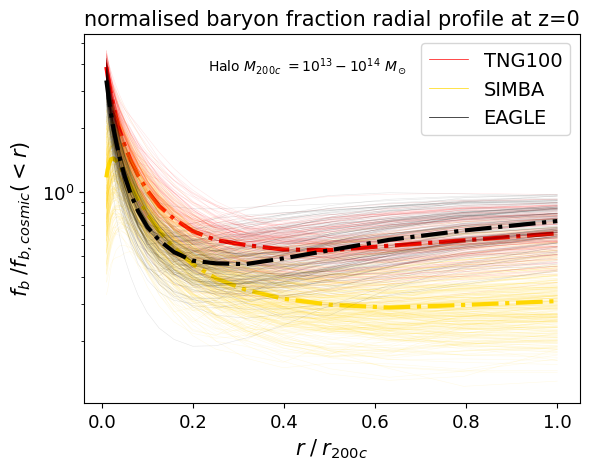

In [28]:
fig, ax = plt.subplots()
colors = {'TNG100': 'red', 'SIMBA': 'gold', 'EAGLE': 'black'}
legend_handles = []

for index, (sim, halo_dict) in enumerate(rad_dict.items()):
    if sim in ('TNG100', 'SIMBA', 'EAGLE'): 
        
        legend_handles.append(plt.Line2D([], [], color=colors[sim], lw=0.5, label=sim)) 
        # start an array to store the values of the gas fraction in each bin
        bin_array = np.ones( (len(halo_dict.keys()), 21) )
        
        for i, haloID in enumerate(halo_dict.keys()):
            gas_mass = rad_dict[sim][f'{haloID}']['gas_mass_in_bins_cumulative'] # Msun
            star_mass = rad_dict[sim][f'{haloID}']['star_mass_in_bins_cumulative'] # Msun
            bh_mass = rad_dict[sim][f'{haloID}']['bh_mass_in_bins_cumulative'] # Msun
            tot_mass = rad_dict[sim][f'{haloID}']['tot_mass_in_bins_cumulative'] # Msun
            bar_frac = (gas_mass + star_mass + bh_mass) / tot_mass/0.16
            ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], bar_frac, alpha=0.1, color=colors[sim], lw=0.4) 
            
            for j in range(21):
                    bin_array[i, j] = bar_frac[j]

        median = np.median(bin_array, axis=0)
        ax.plot(rad_dict[sim][f'{haloID}']['norm_radii'][1:], median, '-.', color=colors[sim], lw=3)

ax.set_yscale('log')
ax.set_title('normalised baryon fraction radial profile at z=0', fontsize=15)
ax.set_xlabel('$r \;/\; r_{200c}$', fontsize=15)
ax.set_ylabel('$f_b \; / f_{b,cosmic} (<r)$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
#ax.set_ylim(0, 1)
ax.text(0.25, 0.9, 'Halo $ M _{200c}  $ $ = 10^{13} - 10^{14}$ $ M_\odot $', fontsize=10, transform=ax.transAxes) 
plt.legend(handles=legend_handles, fontsize=14)               
plt.savefig('../plots/barfrac_radprof.pdf')

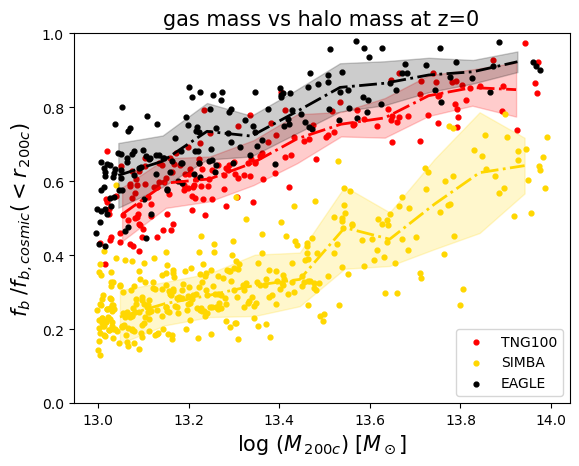

In [85]:
fig, ax = plt.subplots()
colors = {'TNG100': 'red', 'SIMBA': 'gold', 'EAGLE': 'black'}

for sim, halo_dict in rad_dict.items():
    if sim in colors: 
  
        # start an array to store the values of the gas fraction in each bin
        gas_array = np.ones( len(halo_dict.keys()) )
        mass_array = np.ones( len(halo_dict.keys()))


        for index, (haloID, fields_dict) in enumerate(halo_dict.items()):
            
            gas_mass = fields_dict['gas_mass_in_bins_cumulative'][-1]
            bar_mass = (fields_dict['gas_mass_in_bins_cumulative'][-1]
                        + fields_dict['star_mass_in_bins_cumulative'][-1]
                        + fields_dict['bh_mass_in_bins_cumulative'][-1])
            tot_mass = fields_dict['tot_mass_in_bins_cumulative'][-1]
            gas_frac = bar_mass/tot_mass/0.16
            gas_array[index] = gas_frac
            mass_array[index] = np.log10(tot_mass)
        
 
        #print(gas_array)
        # Plot each simulation with a different color
        ax.scatter(mass_array, gas_array, s=12, marker='o', color=colors[sim], label=sim)

        # Calculate median and standard deviation in bins
        nbins = 10
        bin_edges = np.linspace(13, 14, nbins+1)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        median_gas = []
        std_gas = []


        for k in range(nbins):
            bin_mask = (mass_array >= bin_edges[k]) & (mass_array < bin_edges[k + 1])
            if np.any(bin_mask):  
                median_gas.append(np.median(gas_array[bin_mask]))
                std_gas.append(np.std(gas_array[bin_mask]))
            else:
                median_gas.append(np.nan)
                std_gas.append(np.nan)

        # Convert to numpy arrays for plotting
        median_gas = np.array(median_gas)
        std_gas = np.array(std_gas)

        ax.plot(bin_centers, median_gas, color=colors[sim], linestyle='-.', linewidth=2)
        ax.fill_between(bin_centers, median_gas - std_gas, median_gas + std_gas,
                        color=colors[sim], alpha=0.2)

ax.set_title('gas mass vs halo mass at z=0', fontsize=15)
ax.set_xlabel('log ($M_{\,200c}) \; [M_\odot]$', fontsize=15)
ax.set_ylabel('$f_b \; / f_{b,cosmic}(< r_{\,200c})$', fontsize=15)
ax.set_ylim(0, 1)
ax.legend()

plt.savefig('../plots/barfrac_vs_totmass.pdf')